In [433]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [436]:
df_train = pd.read_csv("Datasets/train.csv")

df_train.dropna(inplace=True)
df_train.shape

(6606, 14)

In [437]:
df_test = pd.read_csv('Datasets/test.csv')
df_test.dropna(inplace=True)
df_test.shape


(3281, 13)

In [438]:
df = df_train.append(df_test)

In [439]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4269,9263_01,Earth,True,G/1495/S,TRAPPIST-1e,43.0,False,0.0,0.0,0.0,0.0,0.0,Loisey Heney,NaN
4270,9265_01,Mars,False,D/278/S,TRAPPIST-1e,43.0,False,47.0,0.0,3851.0,0.0,0.0,Toate Cure,NaN
4271,9266_01,Earth,False,F/1796/S,TRAPPIST-1e,40.0,False,0.0,865.0,0.0,3.0,0.0,Danna Peter,NaN
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN


In [440]:
df.shape

(9887, 14)

In [432]:
df.dropna(inplace=True)
df.shape

(6606, 14)

In [441]:
df.drop(columns = ['Name','PassengerId'],inplace = True)

In [27]:
# df.HomePlanet.fillna('Earth',inplace = True)

In [442]:
df.HomePlanet.value_counts()

Earth     5327
Europa    2465
Mars      2095
Name: HomePlanet, dtype: int64

In [443]:
df['HomePlanet'] = df['HomePlanet'].map({'Earth':1,'Europa':2,'Mars':3})

In [444]:
df['HomePlanet'] = df['HomePlanet'].astype(int)

In [445]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9887 entries, 0 to 4276
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    9887 non-null   int32  
 1   CryoSleep     9887 non-null   object 
 2   Cabin         9887 non-null   object 
 3   Destination   9887 non-null   object 
 4   Age           9887 non-null   float64
 5   VIP           9887 non-null   object 
 6   RoomService   9887 non-null   float64
 7   FoodCourt     9887 non-null   float64
 8   ShoppingMall  9887 non-null   float64
 9   Spa           9887 non-null   float64
 10  VRDeck        9887 non-null   float64
 11  Transported   6606 non-null   object 
dtypes: float64(6), int32(1), object(5)
memory usage: 965.5+ KB


In [446]:
df.CryoSleep = df.CryoSleep.fillna('False')

In [53]:
df.CryoSleep.unique()

array([False, True, 'False'], dtype=object)

In [447]:
df['CryoSleep'] = df['CryoSleep'].replace('False',0)

In [448]:
df['CryoSleep'] = df['CryoSleep'].map({False:0 , True:1,0:0})

In [449]:
df.CryoSleep.value_counts()

0    6339
1    3548
Name: CryoSleep, dtype: int64

In [450]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9887 entries, 0 to 4276
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    9887 non-null   int32  
 1   CryoSleep     9887 non-null   int64  
 2   Cabin         9887 non-null   object 
 3   Destination   9887 non-null   object 
 4   Age           9887 non-null   float64
 5   VIP           9887 non-null   object 
 6   RoomService   9887 non-null   float64
 7   FoodCourt     9887 non-null   float64
 8   ShoppingMall  9887 non-null   float64
 9   Spa           9887 non-null   float64
 10  VRDeck        9887 non-null   float64
 11  Transported   6606 non-null   object 
dtypes: float64(6), int32(1), int64(1), object(4)
memory usage: 965.5+ KB


In [451]:
df['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e'], dtype=object)

In [452]:
df['Destination'].value_counts()

TRAPPIST-1e      6907
55 Cancri e      2056
PSO J318.5-22     924
Name: Destination, dtype: int64

In [453]:
df['Destination'] = df['Destination'].map({'TRAPPIST-1e':1,'PSO J318.5-22':2,'55 Cancri e':3})

In [454]:
df['Destination'] = df['Destination'].fillna(1)

In [455]:
df['Destination'] = df['Destination'].astype(int)

In [456]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9887 entries, 0 to 4276
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    9887 non-null   int32  
 1   CryoSleep     9887 non-null   int64  
 2   Cabin         9887 non-null   object 
 3   Destination   9887 non-null   int32  
 4   Age           9887 non-null   float64
 5   VIP           9887 non-null   object 
 6   RoomService   9887 non-null   float64
 7   FoodCourt     9887 non-null   float64
 8   ShoppingMall  9887 non-null   float64
 9   Spa           9887 non-null   float64
 10  VRDeck        9887 non-null   float64
 11  Transported   6606 non-null   object 
dtypes: float64(6), int32(2), int64(1), object(3)
memory usage: 926.9+ KB


In [87]:
df

C:\ProgramData\anaconda3\lib\site-packages\IPython\lib\pretty.py:778: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
C:\ProgramData\anaconda3\lib\site-packages\IPython\core\formatters.py:342: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,2,0,B/0/P,1,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,1,0,F/0/S,1,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,2,0,A/0/S,1,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,2,0,A/0/S,1,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,1,0,F/1/S,1,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1,1,G/1496/S,1,34.0,False,0.0,0.0,0.0,0.0,0.0,NaN
4273,1,0,NaN,1,42.0,False,0.0,847.0,17.0,10.0,144.0,NaN
4274,3,1,D/296/P,3,28.0,False,0.0,0.0,0.0,0.0,0.0,NaN
4275,2,0,D/297/P,1,28.0,False,0.0,2680.0,0.0,0.0,523.0,NaN


In [86]:
df['Age'] = df['Age'].fillna(int(df['Age'].mean()))
# df['Age'].mean()

In [457]:
df['Age']  = df['Age'].astype(int)

In [458]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9887 entries, 0 to 4276
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    9887 non-null   int32  
 1   CryoSleep     9887 non-null   int64  
 2   Cabin         9887 non-null   object 
 3   Destination   9887 non-null   int32  
 4   Age           9887 non-null   int32  
 5   VIP           9887 non-null   object 
 6   RoomService   9887 non-null   float64
 7   FoodCourt     9887 non-null   float64
 8   ShoppingMall  9887 non-null   float64
 9   Spa           9887 non-null   float64
 10  VRDeck        9887 non-null   float64
 11  Transported   6606 non-null   object 
dtypes: float64(5), int32(3), int64(1), object(3)
memory usage: 888.3+ KB


In [459]:
df['VIP'].unique()

array([False, True], dtype=object)

In [460]:
df['VIP'].value_counts()

False    9667
True      220
Name: VIP, dtype: int64

In [95]:
df['VIP'] = df['VIP'].fillna(False)

In [461]:
df['VIP'] = df['VIP'].map({True:1,False:0})

In [462]:
df.isnull().sum()

HomePlanet         0
CryoSleep          0
Cabin              0
Destination        0
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Transported     3281
dtype: int64

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    12970 non-null  int32  
 1   CryoSleep     12970 non-null  int64  
 2   Destination   12970 non-null  int32  
 3   Age           12970 non-null  int32  
 4   VIP           12970 non-null  int64  
 5   RoomService   12970 non-null  float64
 6   FoodCourt     12970 non-null  float64
 7   ShoppingMall  12970 non-null  float64
 8   Spa           12970 non-null  float64
 9   VRDeck        12970 non-null  float64
 10  Transported   8693 non-null   object 
 11  Deck          12970 non-null  int32  
 12  Num           12970 non-null  int32  
 13  Side          12970 non-null  object 
dtypes: float64(5), int32(5), int64(2), object(2)
memory usage: 1.2+ MB


In [127]:
df['Age'].mean()

28.755898226676948

In [103]:
def fillnullvalue(df , list ):
    for i in list:
        mean1 = df[i].mean()
        df[i] = df[i].fillna(mean1)

In [105]:
fillnullvalue(df,['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'])

In [463]:
df[['Deck','Num','Side']] = df['Cabin'].str.split("/",expand = True)

In [119]:
df

C:\ProgramData\anaconda3\lib\site-packages\IPython\lib\pretty.py:778: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
C:\ProgramData\anaconda3\lib\site-packages\IPython\core\formatters.py:342: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,2,0,B/0/P,1,39,0,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,1,0,F/0/S,1,24,0,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,2,0,A/0/S,1,58,1,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,2,0,A/0/S,1,33,0,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,1,0,F/1/S,1,16,0,303.0,70.0,151.0,565.0,2.0,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1,1,G/1496/S,1,34,0,0.0,0.0,0.0,0.0,0.0,NaN,G,1496,S
4273,1,0,NaN,1,42,0,0.0,847.0,17.0,10.0,144.0,NaN,NaN,NaN,NaN
4274,3,1,D/296/P,3,28,0,0.0,0.0,0.0,0.0,0.0,NaN,D,296,P
4275,2,0,D/297/P,1,28,0,0.0,2680.0,0.0,0.0,523.0,NaN,D,297,P


In [129]:
def fillnullvalue_mode(df , list ):
    for i in list:
        mode1 = df[i].mode()[0]
        df[i] = df[i].fillna(mode1)

In [130]:
fillnullvalue_mode(df,['Deck','Num','Side'])

In [464]:
df.drop(columns = ['Cabin'],inplace  =True)

In [128]:
df['Deck'].mode()[0]

'F'

In [165]:
list1 = ['Transported']

In [167]:
for i in list1:
    df[i] = df[i].astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [143]:
df.Deck.unique()

array(['B', 'F', 'A', 'G', 'E', 'D', 'C', 'T'], dtype=object)

In [465]:
df['Deck'] = df['Deck'].map({'B':2, 'F':6, 'A':1, 'G':7, 'E':5, 'D':4, 'C':3, 'T':8})

In [466]:
df.Side.unique()

array(['P', 'S'], dtype=object)

In [467]:
df.Side.value_counts()

S    4989
P    4898
Name: Side, dtype: int64

In [468]:
df['Side'] = df['Side'].map({'P':1, 'S':0})

In [469]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [470]:
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [471]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9887 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    9887 non-null   int32  
 1   CryoSleep     9887 non-null   int64  
 2   Destination   9887 non-null   int32  
 3   Age           9887 non-null   int32  
 4   VIP           9887 non-null   int64  
 5   RoomService   9887 non-null   float64
 6   FoodCourt     9887 non-null   float64
 7   ShoppingMall  9887 non-null   float64
 8   Spa           9887 non-null   float64
 9   VRDeck        9887 non-null   float64
 10  Transported   6606 non-null   object 
 11  Deck          9887 non-null   int64  
 12  Num           9887 non-null   object 
 13  Side          9887 non-null   int64  
dtypes: float64(5), int32(3), int64(4), object(2)
memory usage: 1.0+ MB


In [472]:
X_train = df[~df['Transported'].isnull()]

In [473]:
X_train.drop(columns = ['Transported'],inplace  = True)

In [474]:
y_train = df_cleaned['Transported']

In [475]:
X_test = df[df['Transported'].isnull()]

In [476]:
X_test.drop(columns = ['Transported'],inplace  = True)

In [477]:
df.to_csv('Datasets/space_cleaned_drop.csv')

In [478]:
df['Transported'] = df['Transported'].map({True:1,False:0})

In [479]:
from sklearn.linear_model import LogisticRegression

In [207]:
log = LogisticRegression()

In [480]:
reg = log.fit(X_train,y_train)

ValueError: Input contains NaN

In [209]:
pred  = reg.predict(X_test)

In [210]:
pred

array([1., 0., 1., ..., 1., 1., 1.])

In [211]:
df_sub  = pd.read_csv('Datasets/sample_submission.csv')

In [212]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  4277 non-null   object
 1   Transported  4277 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 37.7+ KB


In [213]:
df_sub['PassengerId']  = df_test['PassengerId'] 

In [214]:
df_sub['Transported'] = pred

In [215]:
df_sub['Transported'] = df_sub['Transported'].astype(bool)

In [216]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  4277 non-null   object
 1   Transported  4277 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 37.7+ KB


In [217]:
df_sub.to_csv('submission.csv',index = False)

In [201]:
df_sub.columns

Index(['PassengerId', 'Transported'], dtype='object')

In [218]:
df_cleaned = pd.read_csv('Datasets/space_cleaned.csv')

In [220]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    12970 non-null  int64  
 1   HomePlanet    12970 non-null  int64  
 2   CryoSleep     12970 non-null  int64  
 3   Destination   12970 non-null  int64  
 4   Age           12970 non-null  int64  
 5   VIP           12970 non-null  int64  
 6   RoomService   12970 non-null  float64
 7   FoodCourt     12970 non-null  float64
 8   ShoppingMall  12970 non-null  float64
 9   Spa           12970 non-null  float64
 10  VRDeck        12970 non-null  float64
 11  Transported   8693 non-null   object 
 12  Deck          12970 non-null  int64  
 13  Num           12970 non-null  int64  
 14  Side          12970 non-null  int64  
dtypes: float64(5), int64(9), object(1)
memory usage: 1.5+ MB


C:\Users\Sameer\AppData\Local\Temp\ipykernel_9920\3101599504.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_cleaned.corr() , annot=True)


<Axes: >

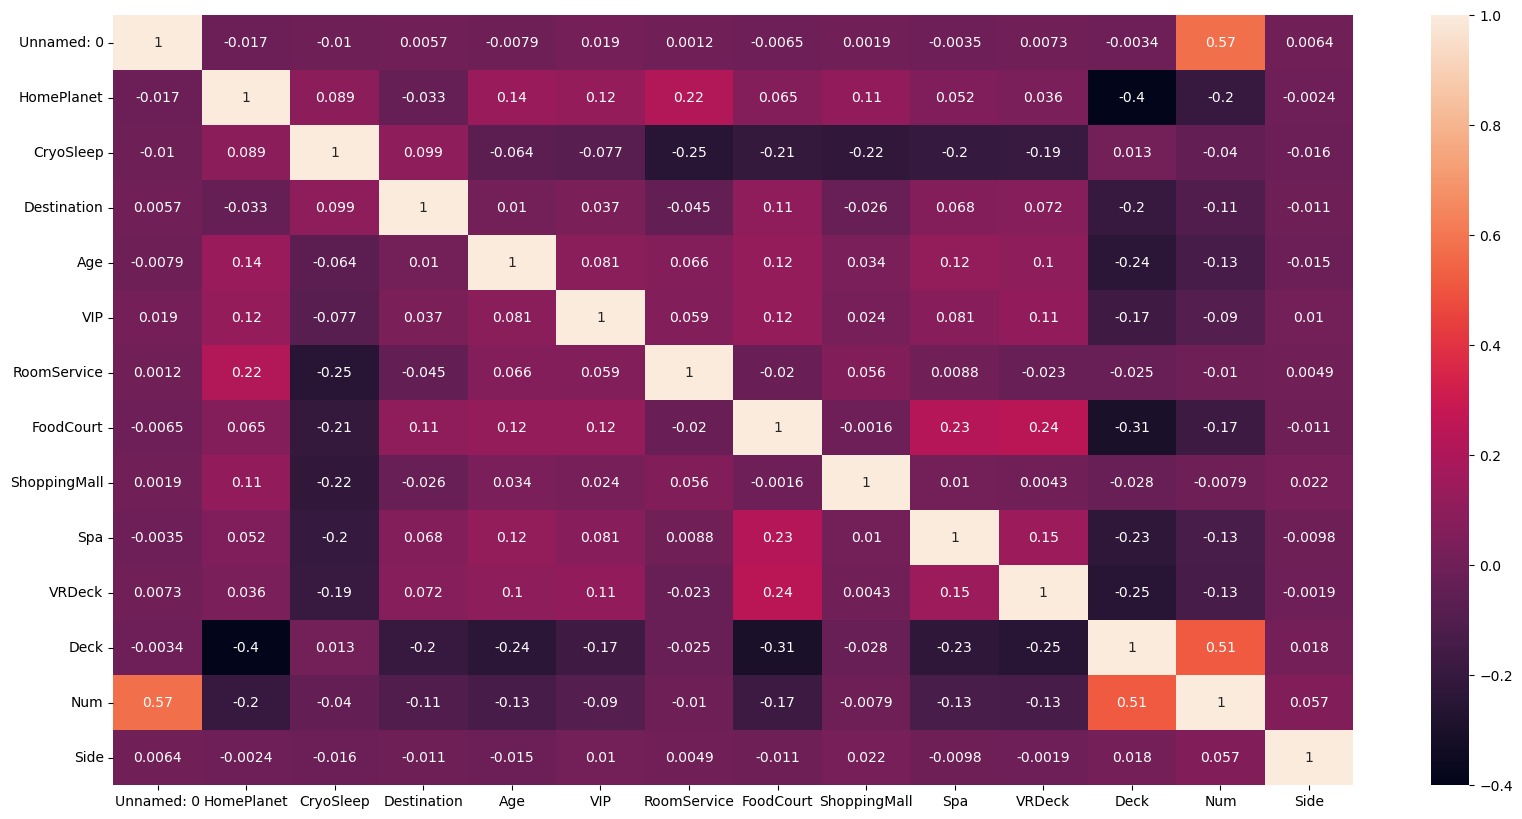

In [226]:
fig = plt.figure(figsize=(20,10))
sns.heatmap(df_cleaned.corr() , annot=True)

In [229]:
df_cleaned.drop(columns = ['Unnamed: 0'],inplace = True)

In [231]:
df_cleaned

C:\ProgramData\anaconda3\lib\site-packages\IPython\lib\pretty.py:778: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
C:\ProgramData\anaconda3\lib\site-packages\IPython\core\formatters.py:342: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,2,0,1,39,0,0.0,0.0,0.0,0.0,0.0,False,2,0,1
1,1,0,1,24,0,109.0,9.0,25.0,549.0,44.0,True,6,0,0
2,2,0,1,58,1,43.0,3576.0,0.0,6715.0,49.0,False,1,0,0
3,2,0,1,33,0,0.0,1283.0,371.0,3329.0,193.0,False,1,0,0
4,1,0,1,16,0,303.0,70.0,151.0,565.0,2.0,True,6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,1,1,1,34,0,0.0,0.0,0.0,0.0,0.0,NaN,7,1496,0
12966,1,0,1,42,0,0.0,847.0,17.0,10.0,144.0,NaN,6,82,0
12967,3,1,3,28,0,0.0,0.0,0.0,0.0,0.0,NaN,4,296,1
12968,2,0,1,28,0,0.0,2680.0,0.0,0.0,523.0,NaN,4,297,1


In [232]:
# X_train_scaled = sc.fit_transform(X_train.values)
# X_test_scaled = sc.transform(X_test.values)

In [239]:
X_test = df_cleaned[df_cleaned['Transported'].isnull()]
X_test.drop(columns = ['Transported'],inplace = True)

C:\Users\Sameer\AppData\Local\Temp\ipykernel_9920\3818375264.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.drop(columns = ['Transported'],inplace = True)


In [248]:
X_train = df_cleaned[~df_cleaned['Transported'].isnull()]
# y_train = X_train['Transported']
X_train = X_train.drop('Transported',axis = 1)

array([False, True], dtype=object)

In [249]:
X_train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side
0,2,0,1,39,0,0.0,0.0,0.0,0.0,0.0,2,0,1
1,1,0,1,24,0,109.0,9.0,25.0,549.0,44.0,6,0,0
2,2,0,1,58,1,43.0,3576.0,0.0,6715.0,49.0,1,0,0
3,2,0,1,33,0,0.0,1283.0,371.0,3329.0,193.0,1,0,0
4,1,0,1,16,0,303.0,70.0,151.0,565.0,2.0,6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,2,0,3,41,1,0.0,6819.0,0.0,1643.0,74.0,1,98,1
8689,1,1,2,18,0,0.0,0.0,0.0,0.0,0.0,7,1499,0
8690,1,0,1,26,0,0.0,0.0,1872.0,1.0,0.0,7,1500,0
8691,2,0,3,32,0,0.0,1049.0,0.0,353.0,3235.0,5,608,0


In [251]:
X_test

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side
8693,1,1,1,27,0,0.0,0.0,0.0,0.0,0.0,7,3,0
8694,1,0,1,19,0,0.0,9.0,0.0,2823.0,0.0,6,4,0
8695,2,1,3,31,0,0.0,0.0,0.0,0.0,0.0,3,0,0
8696,2,0,1,38,0,0.0,6652.0,0.0,181.0,585.0,3,1,0
8697,1,0,1,20,0,10.0,0.0,635.0,0.0,0.0,6,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,1,1,1,34,0,0.0,0.0,0.0,0.0,0.0,7,1496,0
12966,1,0,1,42,0,0.0,847.0,17.0,10.0,144.0,6,82,0
12967,3,1,3,28,0,0.0,0.0,0.0,0.0,0.0,4,296,1
12968,2,0,1,28,0,0.0,2680.0,0.0,0.0,523.0,4,297,1


In [252]:
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [399]:
from sklearn.linear_model import LogisticRegression
log1 = LogisticRegression(C=1,multi_class= 'auto',penalty = None,solver= 'lbfgs')
# {'C': 1, 'multi_class': 'auto', 'penalty': None, 'solver': 'lbfgs'}

In [400]:
reg1 = log1.fit(X_train_scaled,y_train)

In [270]:
y_train['Transported'] = y_train

In [267]:
y_train = y_train.dropna()

In [291]:
y_train = df_cleaned['Transported']


In [282]:
y_train = pd.DataFrame(y_train , columns=['Transported'])

In [292]:
y_train  =y_train.dropna()

In [308]:
y_train = np.array(y_train)

In [302]:
y_train

[array([False, True, False, ..., True, False, True], dtype=object)]

In [305]:
X_train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side
0,2,0,1,39,0,0.0,0.0,0.0,0.0,0.0,2,0,1
1,1,0,1,24,0,109.0,9.0,25.0,549.0,44.0,6,0,0
2,2,0,1,58,1,43.0,3576.0,0.0,6715.0,49.0,1,0,0
3,2,0,1,33,0,0.0,1283.0,371.0,3329.0,193.0,1,0,0
4,1,0,1,16,0,303.0,70.0,151.0,565.0,2.0,6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,2,0,3,41,1,0.0,6819.0,0.0,1643.0,74.0,1,98,1
8689,1,1,2,18,0,0.0,0.0,0.0,0.0,0.0,7,1499,0
8690,1,0,1,26,0,0.0,0.0,1872.0,1.0,0.0,7,1500,0
8691,2,0,3,32,0,0.0,1049.0,0.0,353.0,3235.0,5,608,0


In [358]:
X_train.shape,y_train.shape,X_test.shape

((8693, 13), (8693,), (4277, 13))

In [355]:
y_train = df_cleaned['Transported']

In [356]:
y_train = y_train.dropna()

In [339]:
y_train

array([False, True, False, ..., True, False, True], dtype=object)

In [326]:
from sklearn.datasets import load_iris
# >>> from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)

In [327]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [338]:
y_train.map

AttributeError: 'numpy.ndarray' object has no attribute 'map'

In [336]:
pd.DataFrame(y_train)

,0
0,False
1,True
2,False
3,False
4,True
...,...
8688,False
8689,False
8690,True
8691,False


In [357]:
y_train = y_train.astype(bool)

In [401]:
y_pred  = reg1.predict(X_test)

In [402]:
y_pred

array([False, False, False, ...,  True,  True,  True])

In [403]:
df_sub = pd.read_csv('Datasets/sample_submission.csv')

In [404]:
df_sub['Transported'] = y_pred

In [405]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  4277 non-null   object
 1   Transported  4277 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 37.7+ KB


In [406]:
df_sub

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True


In [407]:
df_sub.to_csv('Submission2.csv',index=False)

In [378]:
type(y_train)


pandas.core.series.Series

In [380]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [392]:
parameters = {'penalty':('l1', 'l2', 'elasticnet', None),'C':[1,10,20] , 'solver':('lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'),'multi_class':('auto', 'ovr', 'multinomial')}


In [393]:
clf = GridSearchCV(log1,param_grid= parameters,cv=5)

In [394]:
clf.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 20],
                         'multi_class': ('auto', 'ovr', 'multinomial'),
                         'penalty': ('l1', 'l2', 'elasticnet', None),
                         'solver': ('lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga')})

In [395]:
clf.best_params_

{'C': 1, 'multi_class': 'auto', 'penalty': None, 'solver': 'lbfgs'}

In [410]:
df_cleaned.isnull().sum()

HomePlanet         0
CryoSleep          0
Destination        0
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Transported     4277
Deck               0
Num                0
Side               0
dtype: int64

In [481]:
df = pd.read_csv("Datasets/space_cleaned_drop.csv")

In [484]:
df.drop('Unnamed: 0',axis = 1,inplace = True)

In [485]:
df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,2,0,1,39,0,0.0,0.0,0.0,0.0,0.0,False,2,0,1
1,1,0,1,24,0,109.0,9.0,25.0,549.0,44.0,True,6,0,0
2,2,0,1,58,1,43.0,3576.0,0.0,6715.0,49.0,False,1,0,0
3,2,0,1,33,0,0.0,1283.0,371.0,3329.0,193.0,False,1,0,0
4,1,0,1,16,0,303.0,70.0,151.0,565.0,2.0,True,6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9882,1,1,1,43,0,0.0,0.0,0.0,0.0,0.0,NaN,7,1495,0
9883,3,0,1,43,0,47.0,0.0,3851.0,0.0,0.0,NaN,4,278,0
9884,1,0,1,40,0,0.0,865.0,0.0,3.0,0.0,NaN,6,1796,0
9885,1,1,1,34,0,0.0,0.0,0.0,0.0,0.0,NaN,7,1496,0


In [487]:
X_test = df[df['Transported'].isnull()]

In [491]:
X_train =  df[df['Transported'].isnull() == False]

In [492]:
y_train = X_train['Transported']

In [493]:
X_train.drop('Transported' ,axis = 1 , inplace = True)

In [495]:
X_test.drop('Transported' ,axis = 1 , inplace = True)

In [496]:
X_test

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side
6606,1,1,1,27,0,0.0,0.0,0.0,0.0,0.0,7,3,0
6607,1,0,1,19,0,0.0,9.0,0.0,2823.0,0.0,6,4,0
6608,2,1,3,31,0,0.0,0.0,0.0,0.0,0.0,3,0,0
6609,2,0,1,38,0,0.0,6652.0,0.0,181.0,585.0,3,1,0
6610,1,0,1,20,0,10.0,0.0,635.0,0.0,0.0,6,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9882,1,1,1,43,0,0.0,0.0,0.0,0.0,0.0,7,1495,0
9883,3,0,1,43,0,47.0,0.0,3851.0,0.0,0.0,4,278,0
9884,1,0,1,40,0,0.0,865.0,0.0,3.0,0.0,6,1796,0
9885,1,1,1,34,0,0.0,0.0,0.0,0.0,0.0,7,1496,0


In [497]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [498]:
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [503]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C=1,multi_class= 'auto',penalty = None,solver= 'lbfgs')

In [ ]:
# y_train.as

In [515]:
reg2 = log.fit(X_train_scaled,y_train)

In [514]:
y_train = y_train.astype(bool)

In [516]:
y_test = log.predict(X_test_scaled)

In [517]:
df_sub = pd.read_csv('Datasets/sample_submission.csv')

In [519]:
df_sub['Transported'] = y_test

ValueError: Length of values (3281) does not match length of index (4277)